# 03 - Ecommerce - Logistics Train

0 0.937608265179 0.803846431952
1000 0.193390661298 0.151084405956
2000 0.192631003404 0.14716521577
3000 0.192591190017 0.146427243714
4000 0.192588666573 0.146250496715
5000 0.19258849958 0.146205607279
6000 0.192588488408 0.146194034977
7000 0.192588487659 0.146191040219
8000 0.192588487608 0.146190264447
9000 0.192588487605 0.146190063437
Final train classification_rate: 0.968847352025
Final test classification_rate: 0.961038961039


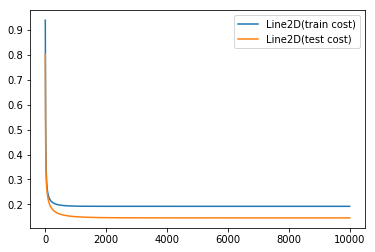

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


#import

# get the data
Xtrain, Ytrain, Xtest, Ytest = get_binary_data()

# randomly initialize weights
D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0 # bias term

# make predictions
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

# cross entropy
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classification_rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()